In [41]:
!pip install circlify

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt 
import circlify as circ
import circlify 
sns.set_theme()

import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [3]:
data_categories = {'SNPs':"Genomics",
                   'CNV':"Genomics",
                   'CpGs (methylation)':"Epigenetics",
                   'SNV':"Genomics",
                   'mRNA (gene expression)': "Transcriptomics",
                   'miRNA':"Epigenetics",
                   'sc-transcriptomics': "Transcriptomics",
                   'sc-ATAC':"Epigenetics",
                   'proteome': "Proteomics",
                   'clinical': "Clinical",
                   'ncRNA':"Epigenetics",
                   'other': "other",
                   'WES':"Genomics",
                   'ChIP-seq':"Epigenetics",
                   'WGS':"Genomics",
                   'genotype':"Genomics",
                   "Copy number alterations":"Genomics",
                   "Fusions":"Genomics",
                   "Mutations":"Genomics"}

model_categories = {
    'VAE':"Autoencoder",
    'VNN (dense)':"Neural network",
    'AE':"Autoencoder",
    'VAE (conditional)':"Autoencoder",
    'Graph Convolutional Network (GCN)':"Graph network",
    'AE (convolutional)':"Autoencoder",
    'LSTM (convolutional)':"Neural network",
    'ensemble (MAE)':"other",
    'fuzzy network':"other",
    'Gaussian-Proces':"other",
    'PCA-like':"other",
    'ANN':"Neural network",
    'VNN (CNN)':"Neural network",
    'AE (vector quantized)':"Autoencoder",
    'AE (stacked)':"Autoencoder",
    'VAE (sparse)':"Autoencoder",
    'Convolutional Neural Network (CNN)':"Neural network",
    'Dense neural network':"Neural network",
    #'Transformer':"",
    'Capsule Network':"other",
    'Factor Graph Neural Network':"Graph network",
    'Self-organising maps (SOM)':"other",
    'AE (sparse)':"Autoencoder",
    'Graph Network':"Graph network"
}

field_categories =  {
    "Oncology":"oncology",
    "Other":"others",
    "traits":"phenotype",
    "immune":"immunology"
}

In [4]:
outPath = "figures"

In [5]:
pd_table1 = pd.read_csv("data/Table_5.csv")

# Task

In [57]:
df = pd_table1.copy()

df["Task"] = df["Task"].str.split(", ")
df = df["Task"].explode()

vals = (df.value_counts() / df.value_counts().sum())*100
vals

classification (supervised)    52.413793
regression (supervised)        22.758621
clustering (unsupervised)      21.379310
survival                        3.448276
Name: Task, dtype: float64

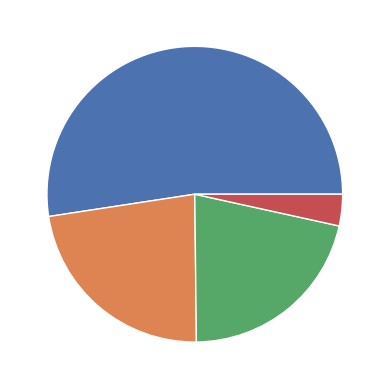

In [47]:
fig, ax = plt.subplots()
ax.pie(vals)
plt.show()

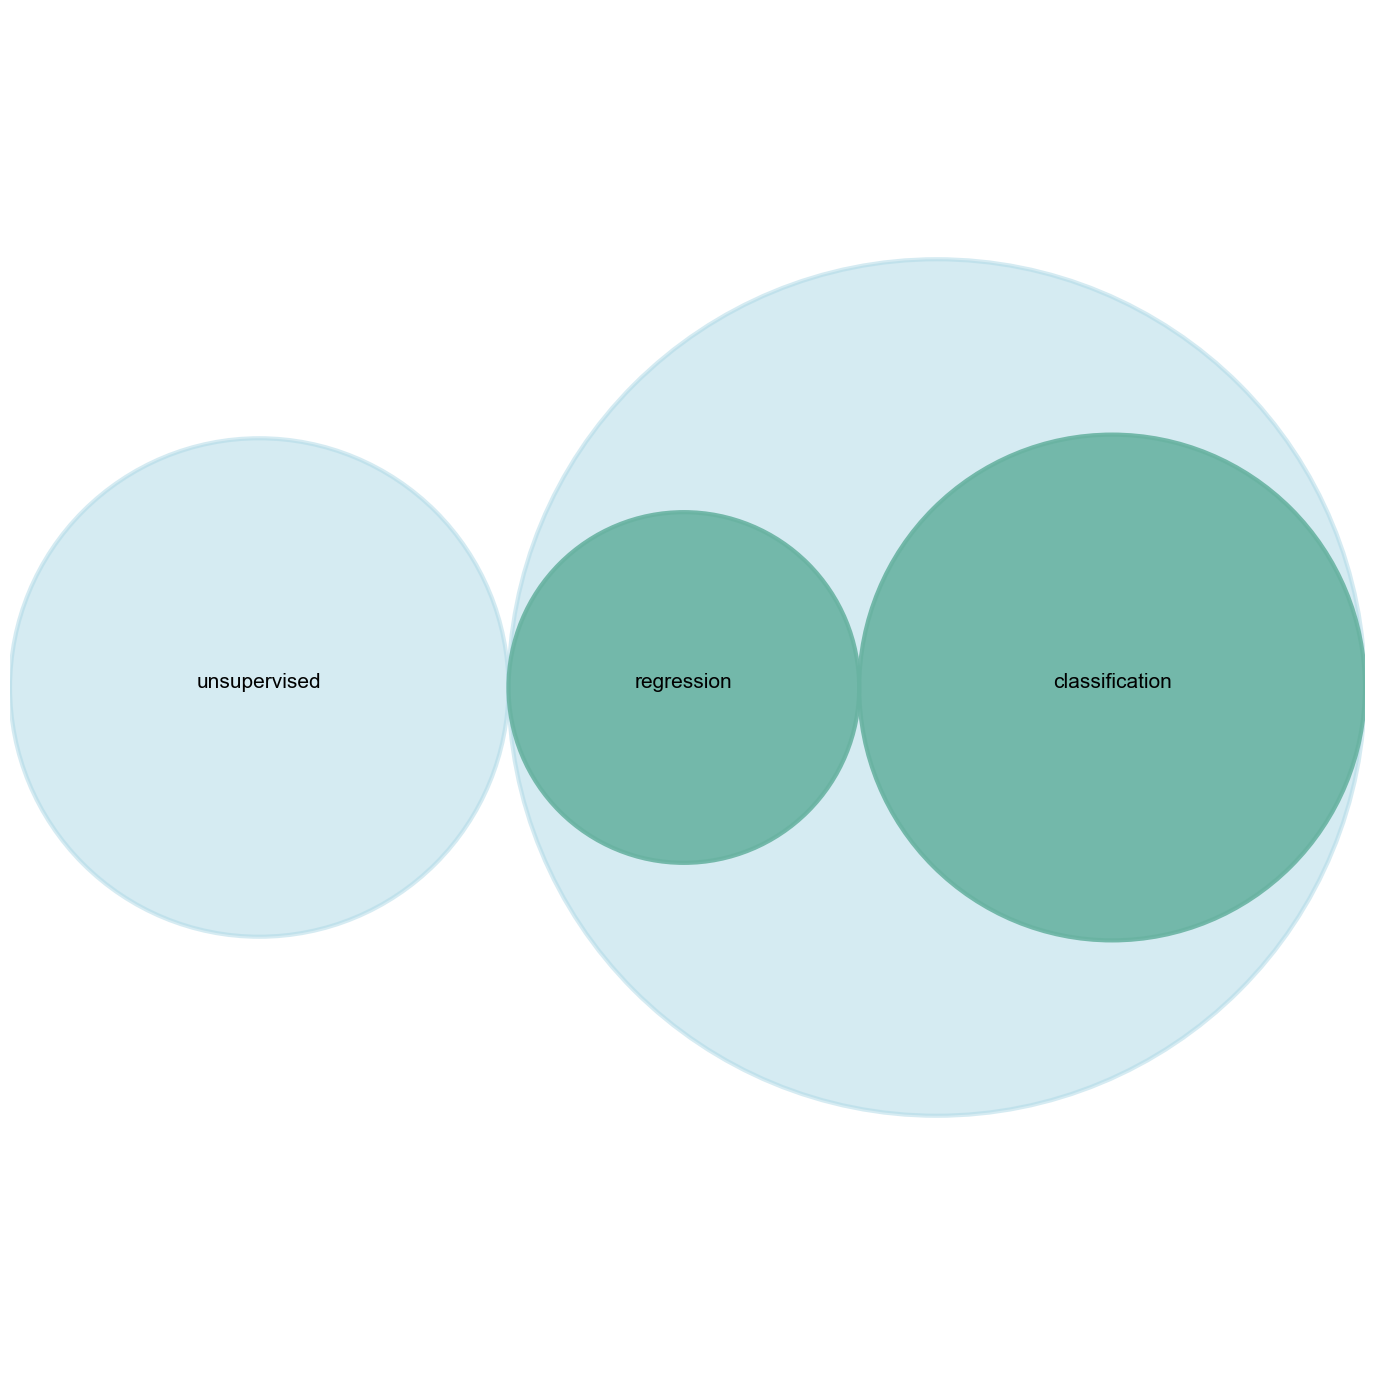

In [48]:
data = [
       {'id': 'supervised', 'datum': 0.62, 'children': [{'id': 'classification', 'datum': 0.52},
                                                        {'id': 'regression', 'datum': 0.25}]},
       {'id': 'unsupervised', 'datum': 0.21},
    ]
# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 1:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=3, color="lightblue"))

    label = circle.ex["id"]
    if label == "unsupervised":
        plt.annotate(label, (x,y), ha='center', color="black")

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.9, linewidth=3, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="black")

plt.tight_layout()
plt.savefig(f"{outPath}/circlify_task.svg", dpi=300)



In [49]:
df

0        clustering (unsupervised)
1      classification (supervised)
2      classification (supervised)
3        clustering (unsupervised)
4        clustering (unsupervised)
                  ...             
117        regression (supervised)
118    classification (supervised)
118        regression (supervised)
119    classification (supervised)
120    classification (supervised)
Name: Task, Length: 145, dtype: object

# Field

In [6]:
df = pd_table1.copy()

df["Applications to"] = df["Applications to"].str.split(", ")
df = df["Applications to"].explode()
df.replace(field_categories, inplace=True)

vals = (df.value_counts() / df.value_counts().sum())*100


all_labels = []
for i, val in enumerate(vals):

    label_i = f"{vals.index[i]} ({round(val,1)}%)"
    all_labels.append(label_i)

/tmp/ipykernel_16728/2980166305.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(patches,


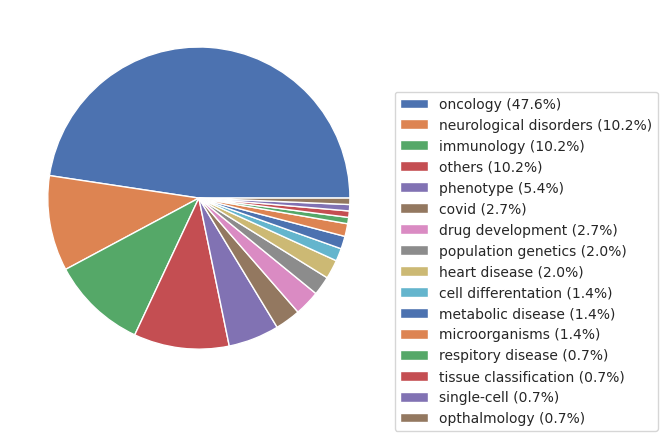

In [8]:
fig, ax = plt.subplots(figsize=(7,7))

patches, _  = ax.pie(vals)
ax.legend(patches, 
          labels=all_labels, 
           bbox_to_anchor=(1, 0.8), fontsize=10)

plt.tight_layout()
plt.savefig(f"{outPath}/applications.svg", dpi=300)

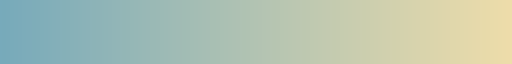

In [18]:
cmap = sns.color_palette("blend:#7AB,#EDA", as_cmap=True)

/home/sonja/miniconda3/envs/env_universal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sonja/miniconda3/envs/env_universal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sonja/miniconda3/envs/env_universal/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


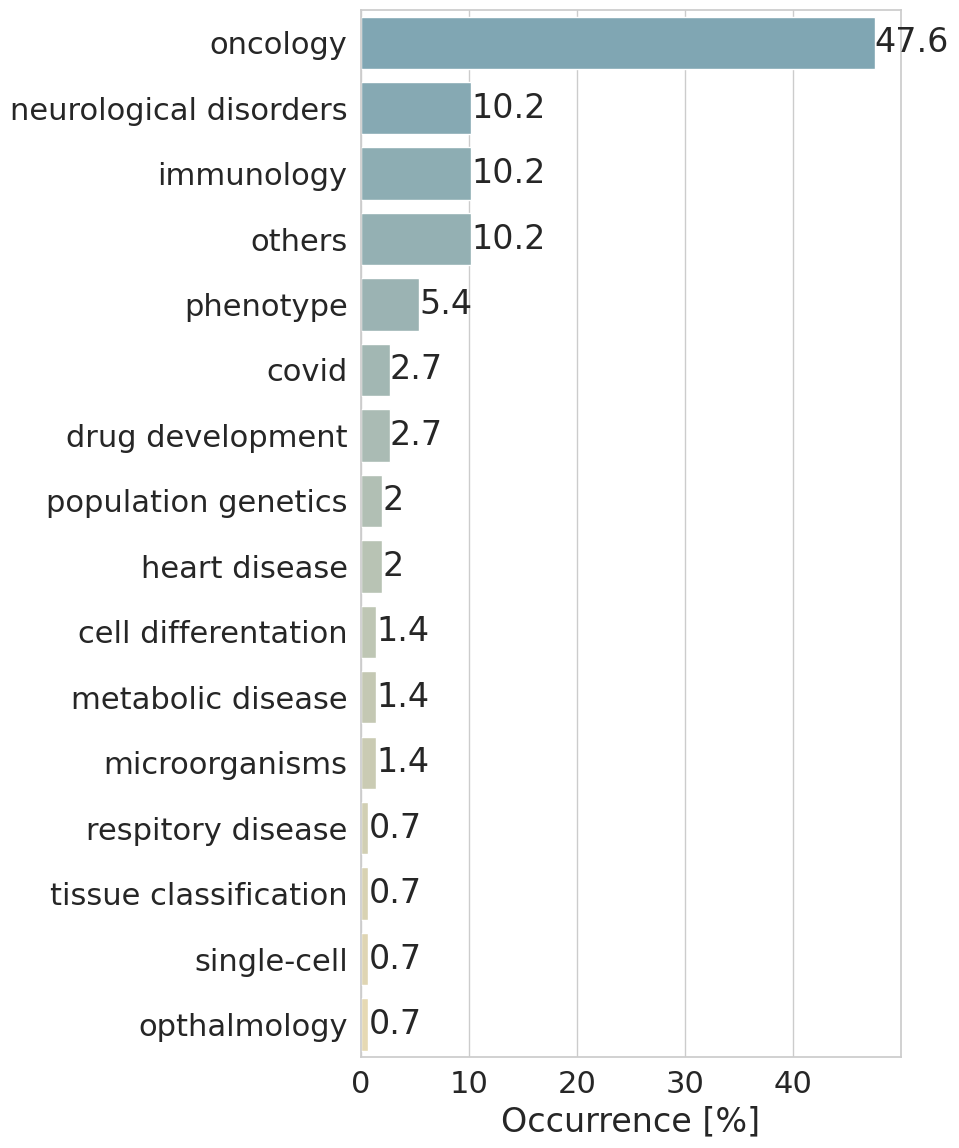

In [9]:
sns.set(font_scale=2)
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10,12))

a = pd.DataFrame(vals)
a["application"] = vals.index
a["application"].replace(field_categories, inplace=True)
a["count"] = round(a["count"],1)

#cmap = sns.color_palette("blend:#7AB,#EDA", as_cmap=True)


ax = sns.barplot(data = a, y="application", x="count", orient="h", palette="blend:#7AB,#EDA")
ax.bar_label(ax.containers[0])
ax.set_ylabel("")
ax.set_xlabel("Occurrence [%]")
plt.tight_layout()
plt.savefig(f"{outPath}/applications_bar_blueYellow.svg", dpi=300)